## Проект: вариант 2
### Задание 1. A/B–тестирование
#### 1.1 Условие  
Одной из основных задач аналитика в нашей команде является корректное проведение экспериментов. Для этого мы применяем метод A/B–тестирования. В ходе тестирования одной гипотезы целевой группе была предложена новая механика оплаты услуг на сайте, у контрольной группы оставалась базовая механика. В качестве задания Вам необходимо проанализировать итоги эксперимента и сделать вывод, стоит ли запускать новую механику оплаты на всех пользователей.

#### 1.2 Входные данные  
В качестве входных данных Вы имеете 4 csv-файла:  
- groups.csv - файл с информацией о принадлежности пользователя к контрольной или экспериментальной группе (А – контроль, B – целевая группа) 
- groups_add.csv - дополнительный файл с пользователями, который вам прислали спустя 2 дня после передачи данных
- active_studs.csv - файл с информацией о пользователях, которые зашли на платформу в дни проведения эксперимента. 
- checks.csv - файл с информацией об оплатах пользователей в дни проведения эксперимента. 
###  

#### 1.3 Вопросы
Предлагаем Вам ответить на следующие вопросы:  
На какие метрики Вы смотрите в ходе анализа и почему?
Имеются ли различия в показателях и с чем они могут быть связаны?
Являются ли эти различия статистически значимыми?
Стоит ли запускать новую механику на всех пользователей?
Данный список вопросов не является обязательным, и Вы можете при своём ответе опираться на собственный план.  
###    
#### 1.4 Требования к ответу  
При выполнении тестового задания необходимо использовать язык программирования Python. 
В файле обязательно должны быть комментарии к тем действиям, которые Вы выполняете с данными. 
Файл должен представлять собой законченный отчёт с выводами, сделанными в ходе исследования.

In [146]:
import os.path

import requests
from urllib.parse import urlencode

import numpy as np
import pandas as pd
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [212]:
sns.set(rc={'figure.figsize':(13, 5)})

In [348]:
# публичные ссылки на файлы в Я.Диск
groups_public_key = 'https://disk.yandex.ru/d/58Us0DWOzuWAjg'
groups_add_public_key = 'https://disk.yandex.ru/d/3aARY-P9pfaksg'
active_studs_public_key = 'https://disk.yandex.ru/d/prbgU-rZpiXVYg'
checks_public_key = 'https://disk.yandex.ru/d/84hTmELphW2sqQ'

In [349]:
def get_yandex_download_url(public_key):
    # Получение ссылки для скачивания файла
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    return download_url

In [350]:
# считываем данные из сетевых файлов в pandas.DataFrame
groups = pd.read_csv(get_yandex_download_url(groups_public_key), sep=';')
groups_add = pd.read_csv(get_yandex_download_url(groups_add_public_key), sep=',')
active_studs = pd.read_csv(get_yandex_download_url(active_studs_public_key))
checks = pd.read_csv(get_yandex_download_url(checks_public_key), sep=';')

In [304]:
pwd

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-stepanjuk-17/final_project'

### EDA ###

In [305]:
groups.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,1489,1627,1768,1783,1794,1803,1805,2067,2078,2080,2085,2213,2215,2229,2234,2264,2272,2277,2290,2385
grp,B,A,B,B,A,B,B,A,A,B,B,A,B,B,B,B,B,B,B,B


In [306]:
groups_add.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
id,5694584,5694830,5695057,5698872,5699067,5699132,5699712,5700613,5700771,5701056,5701066,5701319,5701478
grp,B,B,B,B,B,B,B,B,B,B,B,A,B


In [307]:
active_studs.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
student_id,581585,5723133,3276743,4238589,4475369,5481015,1353433,1394612,1170611,491277,2901778,3349200,1793347


In [308]:
checks.head(13).T

,0,1,2,3,4,5,6,7,8,9,10,11,12
student_id,1627.0,3185.0,25973.0,26280.0,100300.0,100645.0,102534.0,106837.0,108270.0,114366.0,150911.0,158400.0,181671.0
rev,990.0,690.0,690.0,690.0,990.0,630.0,580.0,290.0,290.0,690.0,290.0,690.0,690.0


In [309]:
def describe_unique(tab_name, col_name):
    """Проверка что во всех таблицах содержатся только уникальные id пользователей"""
    
    print(f"""{tab_name} unique id's: {eval(tab_name).shape[0]} {'(matches the number of rows)' 
           if (eval(tab_name).shape[0] == eval(tab_name)[col_name].nunique()) else '(not matches)'},\t\t""" 
           + f" NaNs: {eval(tab_name).isna().sum().sum()}")

In [310]:
describe_unique('groups', 'id')
describe_unique('groups_add', 'id')
describe_unique('active_studs', 'student_id')
describe_unique('checks', 'student_id')

groups unique id's: 74484 (matches the number of rows),		 NaNs: 0
groups_add unique id's: 92 (matches the number of rows),		 NaNs: 0
active_studs unique id's: 8341 (matches the number of rows),		 NaNs: 0
checks unique id's: 541 (matches the number of rows),		 NaNs: 0


Во всех таблицах содержатся только уникальные id и отсутствую NaN значения

In [311]:
# добавляем доп. данные о распределении пользователей по группам
groups_added = groups.append(groups_add)
groups_added.head(3)

,id,grp
0,1489,B
1,1627,A
2,1768,B


In [312]:
# мерджим таблицы слева-направо: начинаем с таблицы с активными пользователями в даты эксперимента
# объединяем с данными о разделении пользователей на группы и далее добавляем данные о платежах
df = active_studs.merge(groups, how='left', left_on='student_id', right_on='id')
df = df.merge(checks, how='left', left_on='student_id', right_on='student_id')
df.head(3)

,student_id,id,grp,rev
0,581585,581585.0,A,NaN
1,5723133,NaN,NaN,NaN
2,3276743,3276743.0,B,NaN


In [313]:
# количество уникальных пользователей в таблице
df.shape[0]

8341

In [314]:
# количество записей с NaN в колонке группы
df.grp.isna().sum()

13

In [315]:
# исключаем 13 юзеров без определенной группы
df = df.drop(df[df.grp.isna()].index)
df = df.drop(columns='id')
df.head()

,student_id,grp,rev
0,581585,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN
5,5481015,B,NaN


In [316]:
# вычисляем предварительные данные для расчета метрик
df_metrics = df.groupby('grp').agg({'rev': ['sum', 'mean', 'median', 'count'], 'student_id': 'count'})
df_metrics

rev                            student_id
             sum         mean  median count      count
grp                                                   
A     72820.0000   933.589744   585.0    78       1535
B    393074.0035  1255.827487  1140.0   313       6793

In [317]:
# рассчитываем метрики
df_metrics['CR'] = df_metrics.rev['count'] / df_metrics.student_id['count']
df_metrics['ARPAU'] = df_metrics.rev['sum'] / df_metrics.student_id['count']
df_metrics['ARPPU'] = df_metrics.rev['sum'] / df_metrics.rev['count']
df_metrics

rev                            student_id        CR       ARPU  \
             sum         mean  median count      count                        
grp                                                                           
A     72820.0000   933.589744   585.0    78       1535  0.050814  47.439739   
B    393074.0035  1255.827487  1140.0   313       6793  0.046077  57.864567   

           ARPPU  
                  
grp               
A     933.589744  
B    1255.827487

Вопросы:   
На какие метрики Вы смотрите в ходе анализа и почему? Имеются ли различия в показателях и с чем они могут быть связаны? Являются ли эти различия статистически значимыми? Стоит ли запускать новую механику на всех пользователей? 

Исходя из имеющихся данных мы можем посчитать CR, ARPAU, ARPPU и средние значения revenue в группах

In [322]:
# Исключаем NaN в колонке с доходом
df = df[df.rev.notna()]
df.head()

,student_id,grp,rev
62,1184303,A,1530.0000
67,3354191,B,1900.0001
77,3278734,B,1900.0000
99,720651,A,1980.0000
193,1232221,B,1900.0000


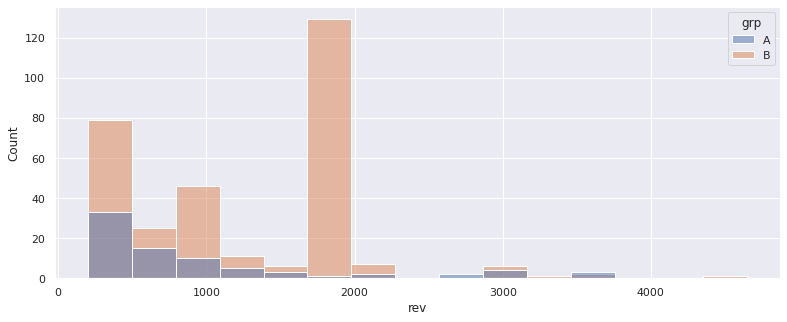

In [324]:
sns.histplot(df, x='rev', hue='grp', bins=15)

Исходя из графика видим большой всплеск в тестовой группе, посмотрим какие значения это создают

In [325]:
df[(df['rev'] >= 1900) & (df['rev'] < 1901)]

,student_id,grp,rev
67,3354191,B,1900.0001
77,3278734,B,1900.0000
193,1232221,B,1900.0000
195,3821501,B,1900.0000
211,1036096,B,1900.0000
...,...,...,...
7742,800185,B,1900.0001
7872,1880452,B,1900.0001
7893,2575187,B,1900.0000
8109,2692209,B,1900.0001


In [326]:
df.rev.count()

391

In [327]:
df[df.grp == 'A'].shape[0]

78

In [328]:
df[df.grp == 'B'].shape[0]

313

В наших данных скорее всего какой-то баг. 127 из 313 значений revenue содержат одинаковые значения, т.е. около половины значений содержат какую-то ошибку При этом в группе А такие значения отсутствуют. 

!Прежде чем делать какие-либо выводы и сравнивать значения в двух группах нужно разобратся с этой аномалией в данных и перезапустить A/B-тест.

Так как в нашем случае такой возможности нет, исключим эти данные из двух групп.

In [329]:
df_drop_outliers = df.drop(df[(df['rev'] >= 1900) & (df['rev'] < 1901)].index)
df_drop_outliers

,student_id,grp,rev
62,1184303,A,1530.0
99,720651,A,1980.0
215,1790619,B,690.0
239,5380274,B,290.0
243,3622791,B,290.0
...,...,...,...
8201,3890326,B,199.0
8204,1390994,A,398.0
8263,1516339,A,290.0
8277,3910596,B,597.0


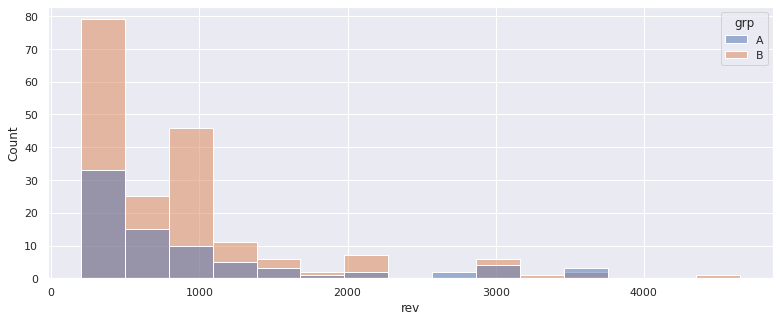

In [333]:
sns.histplot(df_drop_outliers, x='rev', hue='grp', bins=15)

In [330]:
# для удобство создаем два вектора
rev_A = df_drop_outliers[df_drop_outliers.grp == 'A'].rev
rev_B = df_drop_outliers[df_drop_outliers.grp == 'B'].rev

In [334]:
# проверяем гомоскедастичность
ss.levene(rev_A, rev_B)

LeveneResult(statistic=1.334078930436984, pvalue=0.2491331892534503)

Нулевая гипотеза теста Левена: дисперсии генеральной совокупности равны  
В нашем случае проверка не позволяет отклонить нулевую гипотезу, принимаем H0

In [335]:
# проверяем на нормальность распределения
ss.shapiro(rev_A)

ShapiroResult(statistic=0.7353236079216003, pvalue=1.4986822893803264e-10)

In [336]:
ss.shapiro(rev_B)

ShapiroResult(statistic=0.740757942199707, pvalue=9.010076071890185e-17)

Нулевая гипотеза теста Шапиро-Уилка: генеральная совокупность подчиняется нормальному распределению  
В нашем случае проверка обязывает отклонить нулевую гипотезу, принимаем альтернативную H1

Логарифмирование данных не помогло добиться прохождения теста на нормальность.
И хотя t-тест можно использовать для сравнения средних и при ненормальном распределении (на больших выборках особенно) если в данных нет заметных выбросов. Но у нас выбросы есть и выборки крайне небольшие. В данном случае при использовании t-теста возможно завышение ошибки I рода.
Применяем непараметрический тест Манна-Уитни

In [337]:
ss.mannwhitneyu(rev_A, rev_B)

MannwhitneyuResult(statistic=7593.0, pvalue=0.5453040743963742)

Нулевая гипотеза U-теста Манна-Уитни: распределения в первой совокупности и второй то же самое    
В нашем случае проверка не позволяет отклонить нулевую гипотезу, принимаем H0

Следовательно даже если просто исключить данные из выброса, то наш эксперимент не позволяет сказать, что в результате получены значемые отличия. 

Не стоит запускать новую механику оплаты на всех пользователей. Стоит разобраться с аномалией в данных и повторить эксперимент

### Задание 3. Python ###
3.1 Задача

Реализуйте функцию, которая будет автоматически подгружать информацию из дополнительного файла groups_add.csv (заголовки могут отличаться) и на основании дополнительных параметров пересчитывать метрики.   

Реализуйте функцию, которая будет строить графики по получаемым метрикам.

0. если есть рядом файл groups_add
1. считываем текущий список groups и groups_add
2. добавляем новый список к текущему
3. сохраняем в файл groups.csv
4. удаляем groups_add.csv

5. пересчитываем метрики
6. сохраняем метрики в csv

In [50]:
groups_public_key = 'https://disk.yandex.ru/d/58Us0DWOzuWAjg'
groups_add_public_key = 'https://disk.yandex.ru/d/3aARY-P9pfaksg'

In [51]:
groups = pd.read_csv(get_yandex_download_url(groups_public_key), sep=';')
groups_add = pd.read_csv(get_yandex_download_url(groups_add_public_key), sep=',')

In [351]:
def add_groups(groups, groups_add, path=''):
    """Добавляем дополнительные строки с распределением id пользователей по группам"""
    
    if path == '': 
        path = !pwd    
    
    # переименовываем колонки, так как в новом файле они могут отличаться
    groups_add = groups_add.rename(columns={groups_add.columns[0]: 'id', groups_add.columns[1]: 'grp'})
    
    # избавляемся от дублей id, чтобы в последующем merge не получить декартово произведение
    if groups['id'].nunique() != groups.shape[0]:
        groups = groups.drop_duplicates('id', keep='first')
    
    if groups_add['id'].nunique() != groups_add.shape[0]:
        groups_add = groups_add.drop_duplicates('id', keep='first')
    
    #groups_added = groups.append(groups_add)
    
    # вариант с merge в данном случае предпочтительнее append, так как в файле 'groups_add' возможны 
    # задвоения индексов 'id'
    groups_added = groups.merge(groups_add, how='outer', on='id')
    
    groups_added['grp'] = groups_added['grp_x'].combine_first(groups_added['grp_y'])
    groups_added = groups_added[['id', 'grp']]
    
    # обновляем файл 'groups.csv' в указанной директории
    #groups_added.reset_index()
    groups_added.to_csv('groups.csv', index=False)  
    print('Done')

In [352]:
def merge_all_tables(groups, active_studs, checks):
    
    # мерджим таблицы слева-направо: начинаем с таблицы с активными пользователями в даты эксперимента
    # объединяем с данными о разделении пользователей на группы и далее добавляем данные о платежах
    df = active_studs.merge(groups, how='left', left_on='student_id', right_on='id')
    df = df.merge(checks, how='left', left_on='student_id', right_on='student_id')
    
    # Исключаем юзеров без определенной группы
    df = df.drop(df[df.grp.isna()].index)
    df = df.drop(columns='id')

    return df

In [353]:
def get_metrics(df):
    # вычисляем среднее и другие значение, подготовка к вычислению целевых метрик
    df = df.groupby('grp', as_index=True).agg({'rev': ['sum', 'mean', 'median', 'count'], 'student_id': 'count'})
    
    # вычисляем метрики CR, ARPAU, ARPPU
    df['CR'] = df.rev['count'] / df5.student_id['count']
    df['ARPAU'] = df.rev['sum'] / df5.student_id['count']
    df['ARPPU'] = df.rev['sum'] / df5.rev['count']
    
    # избавляемся от multiindex
    df.columns = ['_'.join(col) if col[-1] != '' else col[0] for col in df.columns.values]
    df = df.reset_index()
    
    # добавляем колонку с текущей датой, для дальнейшего построения графика измениния
    # метрик во времени. (даты в данных отсутствуют)
    df.insert(0, 'date', pd.Timestamp.now())

    return df

In [354]:
def append_metrics(df, path):
    """Добавляем рассчитанные метрики в файл если он существует, либо создаем новый"""
    
    if os.path.exists(path):
        print('File exists')
        df_saved = pd.read_csv(path)
        df_saved = df_saved.append(df, ignore_index=True)
        df_saved.to_csv(path, index=False)
    else:
        print('File not exists')
        df.to_csv(path, index=False) 

In [355]:
append_metrics(df, 'test.csv')

File exists


In [356]:
def plot_metrics(path):
    """Выводим графики изменения во времени для CR, ARPAU, ARPPU"""
    
    df = pd.read_csv(path)
    df['date'] = df['date'].astype('datetime64')
    sns.lineplot(x=df['date'].dt.strftime('%Y-%b-%d'), y=df['CR'], hue=df['grp'])
    plt.figure()
    sns.lineplot(x=df['date'].dt.strftime('%Y-%b-%d'), y=df['ARPAU'], hue=df['grp'])
    plt.figure()
    sns.lineplot(x=df['date'].dt.strftime('%Y-%b-%d'), y=df['ARPPU'], hue=df['grp'])
    plt.show()

In [357]:
def pipeline(groups, active_studs, checks, metrics_file_path):    
    # производим все действия в одной функции
    
    df = merge_all_tables(groups, active_studs, checks)
    df = get_metrics(df)
    append_metrics(df, metrics_file_path)
    plot_metrics(metrics_file_path)

File exists


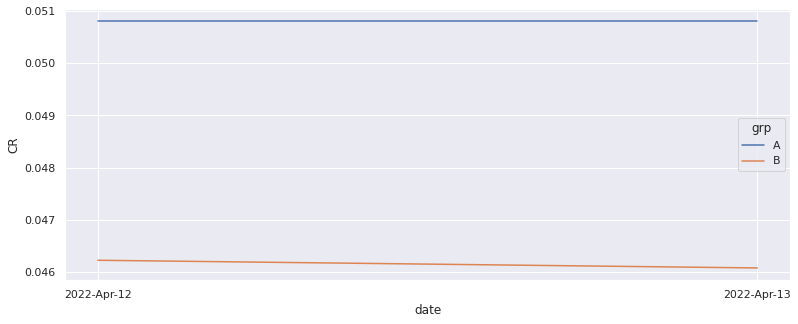

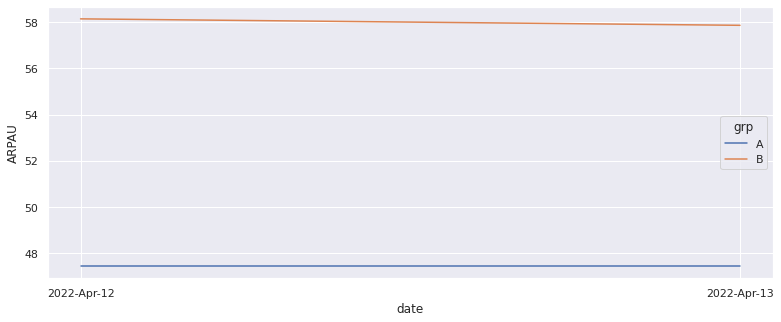

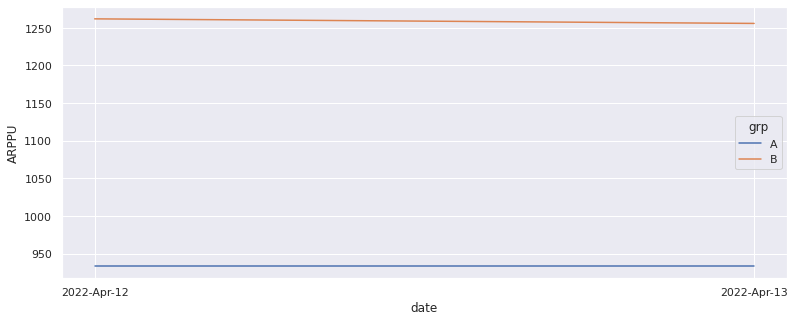

In [367]:
pipeline(groups, active_studs, checks, 'metrics.csv')

В данном случае данных мало для построения красивых графиков